In [1]:
#pip install ruptures

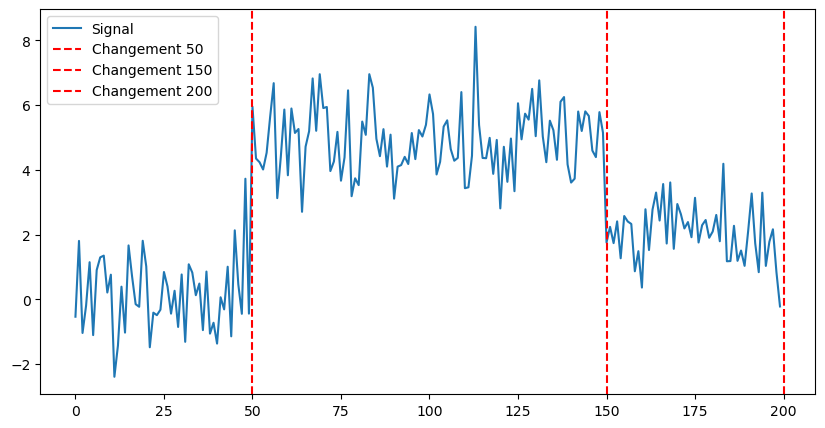

In [2]:
import numpy as np
import ruptures as rpt
import matplotlib.pyplot as plt

# Génération d'un signal avec rupture
n_samples = 200
n_bkps = 2  # Nombre de points de rupture
signal = np.concatenate([
    np.random.normal(0, 1, 50),
    np.random.normal(5, 1, 100),
    np.random.normal(2, 1, 50)
])

# Détection des points de rupture
algo = rpt.Binseg(model="l2").fit(signal)
bkps = algo.predict(n_bkps)

# Affichage du signal et des points de rupture
plt.figure(figsize=(10, 5))
plt.plot(signal, label="Signal")
for bkp in bkps:
    plt.axvline(bkp, color="red", linestyle="--", label=f"Changement {bkp}")
plt.legend()
plt.show()

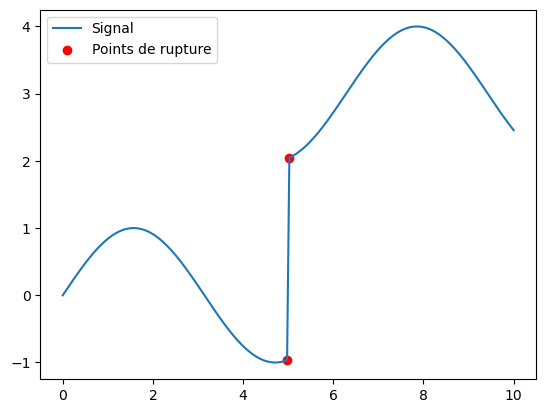

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Signal fictif avec rupture
x = np.linspace(0, 10, 200)
y = np.piecewise(x, [x < 5, x >= 5], [lambda x: np.sin(x), lambda x: np.sin(x) + 3])

# Calcul de la dérivée
dy = np.gradient(y)
threshold = 1  # Seuil à ajuster
rupture_points = np.where(np.abs(dy) > threshold)[0]
# Affichage
plt.plot(x, y, label="Signal")
plt.scatter(x[rupture_points], y[rupture_points], color='red', label="Points de rupture")
plt.legend()
plt.show()

In [6]:
val_bid = np.array([209.49725682, 210.86252232, 208.2172231 , 209.05420359,
       209.38762058, 214.82541892, 208.1085747 , 206.89508854,
       205.93294975, 209.08287705, 207.51109116, 205.67548685,
       205.05775729, 210.56178687, 209.32695331, 204.60843977,
       210.36873024, 204.27735294, 208.987012  , 210.56536614,
       207.57707939, 209.78482634, 212.29385597, 210.60538987,
       210.44666153, 209.89137979, 210.2994307 , 209.73223494,
       211.13887253, 210.32793169, 209.69272493, 208.56038923,
       208.35822482, 208.80238779, 209.03972715, 210.18268269,
       207.77338207, 211.61211186, 207.0593839 , 209.23256322,
       209.69380145, 207.97212148, 208.58994016, 208.84160162,
       208.09720391, 205.56746305, 207.37534368, 204.88175129,
       207.41049927, 209.94584396, 208.75467416, 214.31675978,
       212.82954606, 209.29156375, 205.2852026 , 210.25371004,
       211.30188443, 210.00696644, 208.80294134, 209.46456016,
       210.97172844, 209.95474063, 211.27574297, 210.58288566,
       211.01117813, 206.81936094, 207.36124028, 208.49090351,
       209.09781641, 210.91383846, 209.18126923, 207.51896805,
       209.88862782, 206.87465815, 210.03935765, 206.62106465,
       207.56523208, 213.97996232, 205.88627814, 210.46888931,
       207.36895794, 204.24269086, 212.02424544, 206.53988697,
       206.6763254 , 203.78254478, 210.88466206, 207.20071427,
       205.9503752 , 214.70332908, 214.40251229, 207.75359363,
       212.93433129, 211.80703733, 207.4936324 , 208.10571835,
       208.87162349, 208.7332267 , 209.84946851, 208.14527852,
       209.55379105, 210.41960121, 209.41215681, 206.18002518,
       210.03802769, 210.11414466, 206.11629878, 209.55395486,
       212.23574121, 212.35311753, 209.01483214, 208.94008921,
       209.08990785, 207.28898456, 202.81760797, 209.5998772 ,
       210.54074456, 205.3401045 ,          np.nan, 209.45924401,
       210.23448607, 207.70205125, 206.22648073, 209.08946785,
       208.0650052 , 211.02766114, 212.59774156, 209.91766083,
       210.19885927, 210.85269655, 212.64630622, 212.53989736,
       211.76322475, 208.23402531, 207.53893485, 209.14022954,
       208.6596757 , 210.43958247, 207.7114693 , 209.02781322,
       208.58859714, 209.91999896, 209.51506719, 208.09359782,
       206.09688104, 213.25428599, 208.269257  ])

[  6  18  53  55  76  80  88  89  90 107 113 115 146]


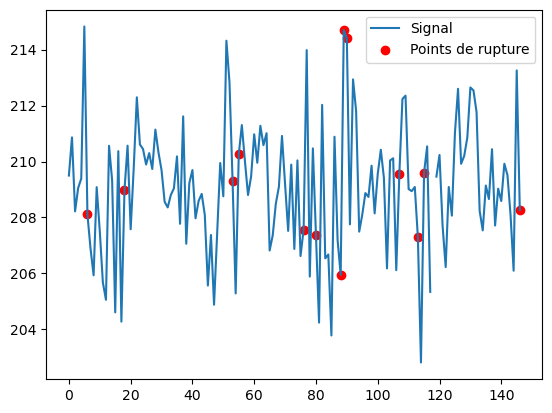

In [7]:
plt.figure()
dy = np.gradient(val_bid)
threshold = 3  # Seuil à ajuster
rupture_points = np.where(np.abs(dy) > threshold)[0]
x=np.arange(0,len(val_bid))
print(rupture_points)
# Affichage
plt.plot(x,val_bid, label="Signal")
plt.scatter(x[rupture_points], val_bid[rupture_points], color='red', label="Points de rupture")
plt.legend()
plt.show()

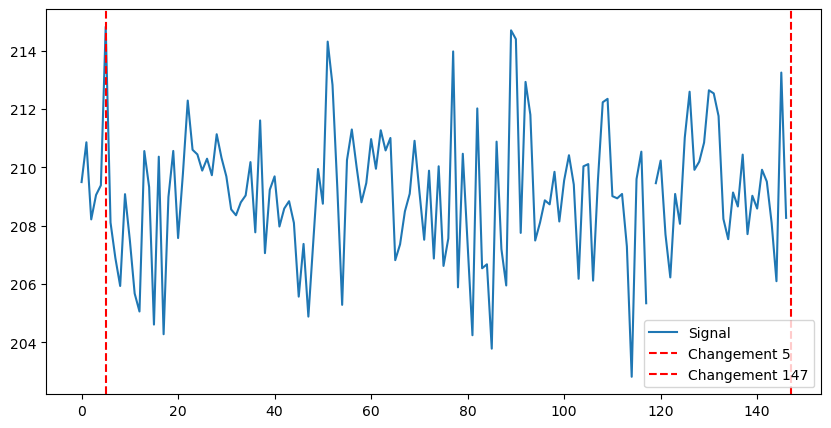

In [16]:
# Génération d'un signal avec rupture
n_bkps = 1  # Nombre de points de rupture


# Détection des points de rupture
algo = rpt.Binseg(model="l2").fit(val_bid)
bkps = algo.predict(n_bkps)

# Affichage du signal et des points de rupture
plt.figure(figsize=(10, 5))
plt.plot(val_bid, label="Signal")
for bkp in bkps:
    plt.axvline(bkp, color="red", linestyle="--", label=f"Changement {bkp}")
plt.legend()
plt.show()